<a href="https://colab.research.google.com/github/Delonix7/My_Data_Science_Projects/blob/main/California_Housing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Main steps to be covered in this project


1. Look at the big picture
2. Get the data
3. Discover and visualise the data to gain insights
4. Prepare the data for ML algorithms
5. Select a model and train it
6. Fine tune the model
7. Present the solution
8. Launch, monitor and maintain the system 

#### This project will use the California Housing Prices dataset from the StatLib repository. This dataset is based on data from the 1990 California census.


# 1. Look at the Big Picture

The task is to use the California census data to build a model of housing prices in the state.

* Frame the problem. How does the company expect to use and benefit from this model? Know the object or end goal of the machine learning project. This will help you choose the right algorithms and performance measure to use.

### Type of ML algorithm: A regression model with batch learning will be used.

### Big Picture: The Output of the ML model will be fed into another model that will be used to make investment decisions



#2. Get the Data

##Importing data in a zip file from a web address


In [1]:
import os
import tarfile
import numpy as np
import pandas as pd
import seaborn as sns
import urllib.request as ur
import matplotlib.pyplot as plt

In [2]:
def fetch_data(url, file_path):
  os.makedirs (file_path, exist_ok= True) #creates the directories using the file path
  tgz_path = os.path.join (file_path, 'housing.tgz') #creares the path for the file to be downloaded and names it 'housing.tgz'
  ur.urlretrieve(url, tgz_path) # requests the file from the url and stores it at tgz_path
  file_tgz = tarfile.open(tgz_path) #opens the zip file
  file_tgz.extractall(path = file_path)
  file_tgz.close()

In [3]:
def read_file (filePath):
  csvPath = os.path.join(filePath, 'housing.csv')
  return pd.read_csv(csvPath) 

In [4]:
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
file_path = os.path.join('Datasets', 'housing')

fetch_data(url, file_path)

In [5]:
housing = read_file(file_path)

## Viewing data properties

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
housing.shape

(20640, 10)

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Visualizations

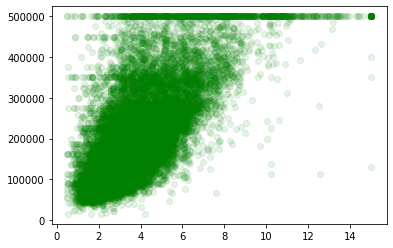

<Figure size 1008x720 with 0 Axes>

In [12]:
plt.scatter(x = 'median_income', y = 'median_house_value', data = housing, alpha = 0.1, c = 'green')
plt.figure(figsize = (14,10))
plt.show()

In [13]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


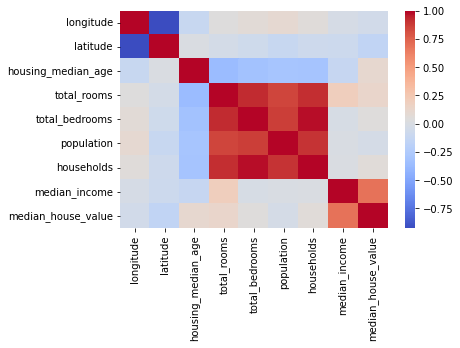

In [14]:
sns.heatmap(data = housing.corr(), cmap = 'coolwarm')
plt.show()

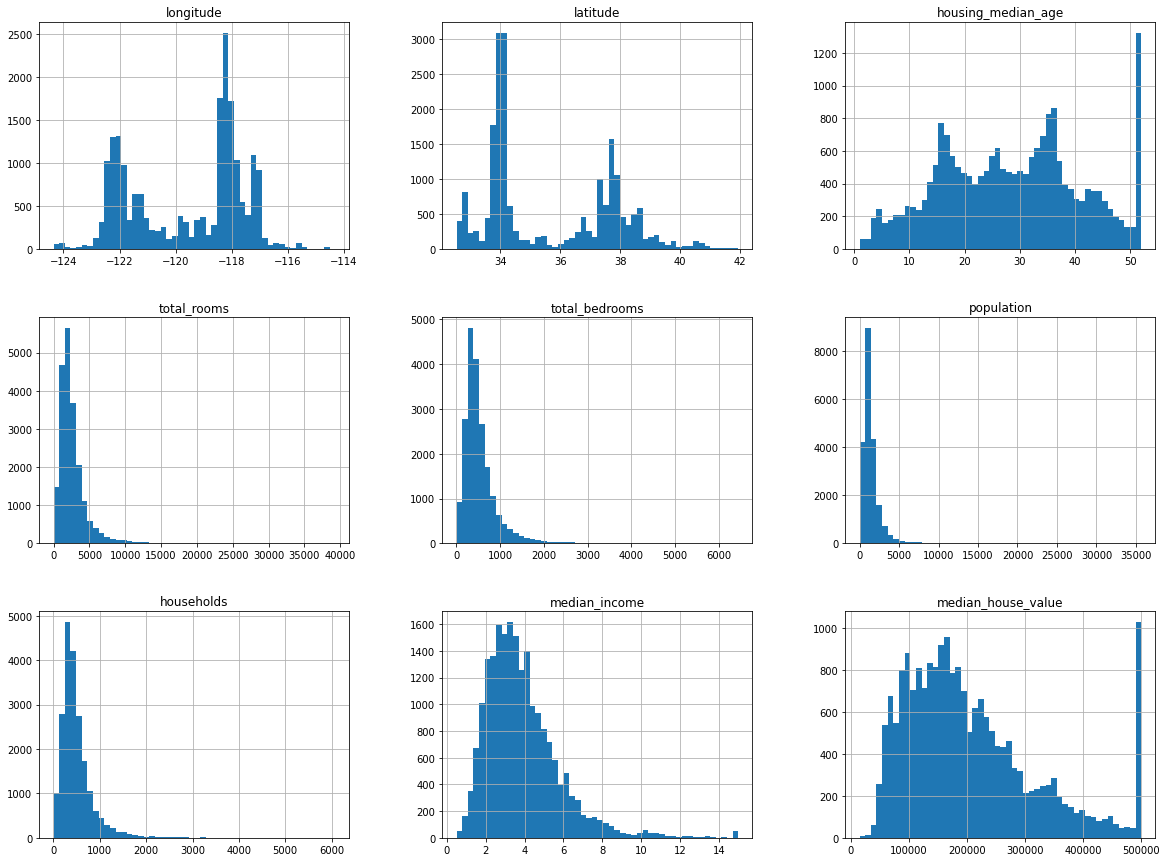

In [15]:
housing.hist(bins = 50, figsize= (20,15))
plt.show()

In [16]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## Ways of splitting data

If the data for some of the features is skewed, then the dataset will need to be stratified to ensure even distribution of observations in both the test and training sets

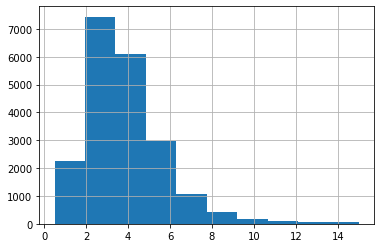

In [17]:
#To create the bins, look at the distribution of the attribute
housing['median_income'].hist()
plt.show()

In [18]:
housing['Income_cat'] = pd.cut(housing['median_income'], bins = [0., 1.5, 3.0, 4.5, 6.0, np.inf],
                                   labels = [1, 2, 3, 4, 5])

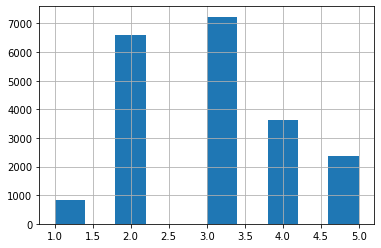

In [19]:
housing['Income_cat'].hist()
plt.show()

In [20]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [21]:
#Splitting data based on strata

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits= 1, test_size= 0.2, random_state= 42)
for train_index, test_index in split.split(housing, housing['Income_cat']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [22]:
#Splitting data with no regard for Income category strata using sklearn
from sklearn.model_selection import train_test_split
X = housing[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','Income_cat','ocean_proximity']]
y = housing['median_house_value']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
#Splitting data with no regard for Income category strata using numpy and a user defined function

def split_train_test(data, train_ratio):
  np.random.seed(42)
  mask = np.random.rand(len(data)) < train_ratio
  return data[mask], data[~mask]
  #this function will break if the data set is updated, i.e. different observations in test and train set

In [24]:
0xffffffff

4294967295

In [25]:
(2**32)*0.8

3435973836.8

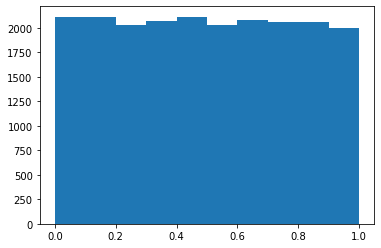

In [26]:
plt.hist(np.random.rand(len(housing)))
plt.show()

In [27]:
train_func, test_func = split_train_test(housing, 0.8)

In [28]:
#comparing the income category proportions across the various datasets.
props = pd.DataFrame()
#proportions for the stratified split
props['strat_test_set'] = strat_test_set['Income_cat'].value_counts()/len(strat_test_set)
props['strat_train_set'] = strat_train_set['Income_cat'].value_counts()/len(strat_train_set)

#proportions for the train_test_split in scikit_learn
props['Xtest'] = Xtest['Income_cat'].value_counts()/len(Xtest)
props['Xtrain'] = Xtrain['Income_cat'].value_counts()/len(Xtrain)

#proportions from the user defined function
props['test_func'] = test_func['Income_cat'].value_counts()/len(test_func)
props['train_func'] = train_func['Income_cat'].value_counts()/len(train_func)

props['housing'] = housing['Income_cat'].value_counts()/len(housing )

In [29]:
error_rate = pd.DataFrame()
error_rate['Strat. % error'] = (props['strat_train_set']- props['housing'])/props['housing'] * 100
error_rate['func. % error'] = (props['train_func']- props['housing'])/props['housing'] * 100
error_rate['Rand. % error'] = (props['Xtrain']- props['housing'])/props['housing'] * 100

In [30]:
props

,strat_test_set,strat_train_set,Xtest,Xtrain,test_func,train_func,housing
3,0.350533,0.350594,0.358527,0.348595,0.350133,0.350693,0.350581
2,0.318798,0.318859,0.324370,0.317466,0.309426,0.321201,0.318847
4,0.176357,0.176296,0.167393,0.178537,0.185365,0.174045,0.176308
5,0.114341,0.114462,0.109496,0.115673,0.115096,0.114274,0.114438
1,0.039971,0.039789,0.040213,0.039729,0.039981,0.039787,0.039826


In [31]:
error_rate

,Strat. % error,func. % error,Rand. % error
3,0.003455,0.031946,-0.566611
2,0.003799,0.738467,-0.433065
4,-0.006870,-1.283802,1.264084
5,0.021169,-0.143643,1.079594
1,-0.091241,-0.097291,-0.243309


In [32]:
#dropping the Income_cat column
strat_test_set.drop(columns = 'Income_cat', axis = 1, inplace = True)
strat_train_set.drop(columns = 'Income_cat', axis =1,  inplace = True)

# # Another way to drop column
# for set_ in (strat_train_set, strat_test_set):
#   set_.drop('Income_cat', axis = 1, inplace =True)

In [33]:
strat_train_set.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN


## Correlations

In [34]:
#creating a copy of the training set to experiment on
housing = strat_train_set.copy()

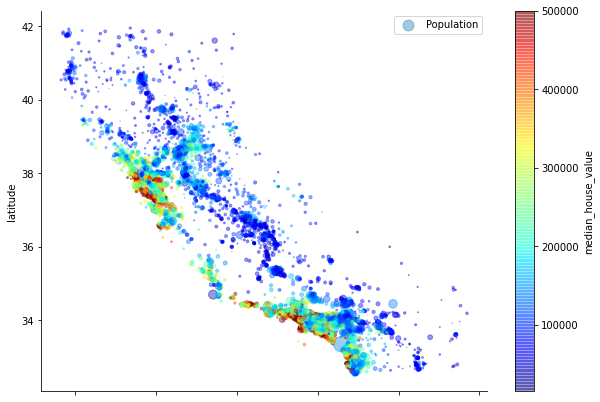

In [35]:
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
housing.plot(kind = 'scatter', x= 'longitude', y= 'latitude', alpha = 0.4, s= housing['population']/150,
                 c = 'median_house_value', cmap = 'jet', figsize = (10,7), label = 'Population',
                 colorbar = True)
plt.legend()
plt.show()

In [36]:
corr_matrix = housing.corr()

In [37]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [38]:
# sns.pairplot(housing[attributes])

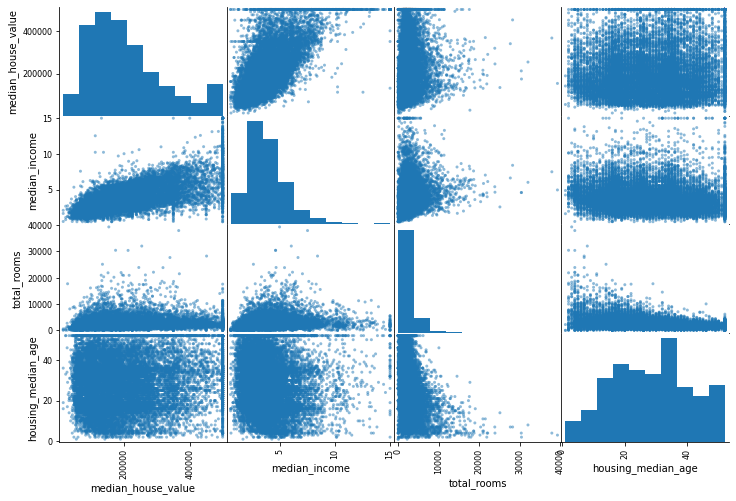

In [39]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms','housing_median_age']
scatter_matrix(housing[attributes], figsize = (12,8))
plt.show()

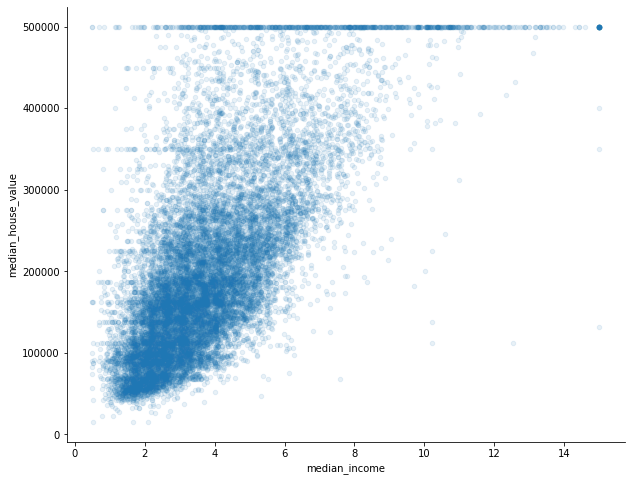

In [40]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1, 
             figsize = (10,8))
plt.show()

## Creating new attribute combinations

In [65]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN


In [ ]:
housing.iloc[:,3]

In [41]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_rooms'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [42]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_rooms         -0.259952
Name: median_house_value, dtype: float64

In [43]:
corr_matrix['longitude']

longitude                   1.000000
latitude                   -0.924478
housing_median_age         -0.105823
total_rooms                 0.048909
total_bedrooms              0.076686
population                  0.108071
households                  0.063146
median_income              -0.019615
median_house_value         -0.047466
rooms_per_household        -0.028374
bedrooms_per_rooms          0.095645
population_per_household   -0.000415
Name: longitude, dtype: float64

In [44]:
housing = strat_train_set.drop(columns = 'median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

### Data Cleaning: Taking Care of missing Data

1. Get rid of the corresponding observations with missing data.
2. Get rid of the whole attribute
3. Set the missing values to some value. Eg. zero, mean, median, mode, etc

In [45]:
housing = strat_train_set.drop(columns= 'median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [52]:
#option 1
# housing1 = housing.dropna(subset = ['total_bedrooms'])

#option 2
# housing2 = housing.drop(columns= 'total_bedrooms', axis = 1)

#option 3
# median = housing['total_bedrooms'].median()
# housing['total_bedrooms'].fillna(median, inplace = True)

In [105]:
# using SimpleImputer from sklearn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
housing_num = housing.drop(columns = 'ocean_proximity', axis = 1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [54]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [55]:
x = imputer.transform(housing_num)

In [57]:
housing_tr = pd.DataFrame(x, columns= housing_num.columns, index = housing_num.index)

In [58]:
imputer.strategy

'median'

###Handling Text and Categorical Attributes

In [131]:
from sklearn.preprocessing import OneHotEncoder

###Custom Transformers

In [72]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 
#the numbers can be replace with a function that returns the index of the columns
#Eg. housing.columns.get_loc('total_rooms') #Output = 3

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  """
  This class takes in a dataframe and computes the rooms_per_household,
  population per household and the bedrooms per room (if not set to False)
  """
  def __init__(self, add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room

  def fit(self, X, y = None):
    return self

  def transform(self, X):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]

    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X,rooms_per_household, population_per_household, bedrooms_per_room]
    
    else:
      return np.c_[X, rooms_per_household, population_per_household]
  


In [85]:
cols = ['longitude'	,'latitude'	,'housing_median_age'	,
        'total_rooms'	,'total_bedrooms'	,'population'	,
        'households'	,'median_income',	'ocean_proximity', 
        'rooms_per_household', 'population_per_household']

In [ ]:
housing.values[:, bedrooms_ix] / housing.values[:, rooms_ix]

In [94]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room= False)
housing_extra_attribs = pd.DataFrame(attr_adder.transform(housing.values), columns= cols, index= range(16512))

In [87]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN


In [95]:
housing_extra_attribs.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698


In [71]:
housing.columns.get_loc('population')

5

###Feature Scaling
min-max scaling (normalization) and standardization

In [100]:
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

stand_scaler = StandardScaler()
minmax_scaler = MinMaxScaler(feature_range= (0,1))
housing_num_minmax = pd.DataFrame(minmax_scaler.fit_transform(housing_num), 
                                  columns= housing_num.columns, index= housing_num.index)
housing_num_stand= pd.DataFrame(stand_scaler.fit_transform(housing_num), 
                                columns= housing_num.columns, index= housing_num.index)

In [108]:
housing_num_stand.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-0.941350,1.347438,0.027564,0.584777,0.635123,0.732602,0.556286,-0.893647
15502,1.171782,-1.192440,-1.722018,1.261467,0.775677,0.533612,0.721318,1.292168


In [109]:
housing_num_minmax.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426
15502,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574


###Transformation Pipelines

In [115]:
from sklearn.pipeline import Pipeline


In [120]:

num_pipeline = Pipeline([ ("imputer", SimpleImputer( strategy= "median")), ("attribs_adder", CombinedAttributesAdder()), ('std_scaler', StandardScaler())])

In [121]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [128]:
from sklearn.compose import ColumnTransformer

In [130]:
cat_attrib = ['ocean_proximity']
num_attribs = list(housing_num)

In [171]:
full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs),
                                   ('cat', OneHotEncoder(), cat_attrib)
])

In [172]:
housing_prepared = pd.DataFrame(full_pipeline.fit_transform(housing))

In [149]:
housing_prepared.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.017395,0.006223,-0.121122,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.569256,-0.040811,-0.810867,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.018024,-0.075371,-0.338273,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.595140,-0.106803,0.961205,0.0,0.0,0.0,0.0,1.0
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,0.251241,0.006109,-0.474513,1.0,0.0,0.0,0.0,0.0


In [174]:
housing_prepared.shape

(16512, 16)

In [ ]:
housing_labels

In [176]:
housing.iloc[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
